In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading Data


In [56]:
df = pd.read_csv('/kaggle/input/churn-ml/Churn_Modelling.csv')
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Determing the Size and Shape of the Dataset

In [57]:
df.shape

(10000, 14)

Determining Datatypes and if any tuple is empty or not

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Determining min, max, mean, std etc in Data

In [59]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Identifying any Duplicate Value

In [60]:
duplicates = (df[df.duplicated()])
print(duplicates)

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


Terminating Duplicates

In [61]:
df.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Label Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])

Dropping useless columns

In [63]:
df = df.drop(columns=['Surname', 'Gender'])

Making Correlation Matrix to gain insights that which column has maximum impact on the traget variables

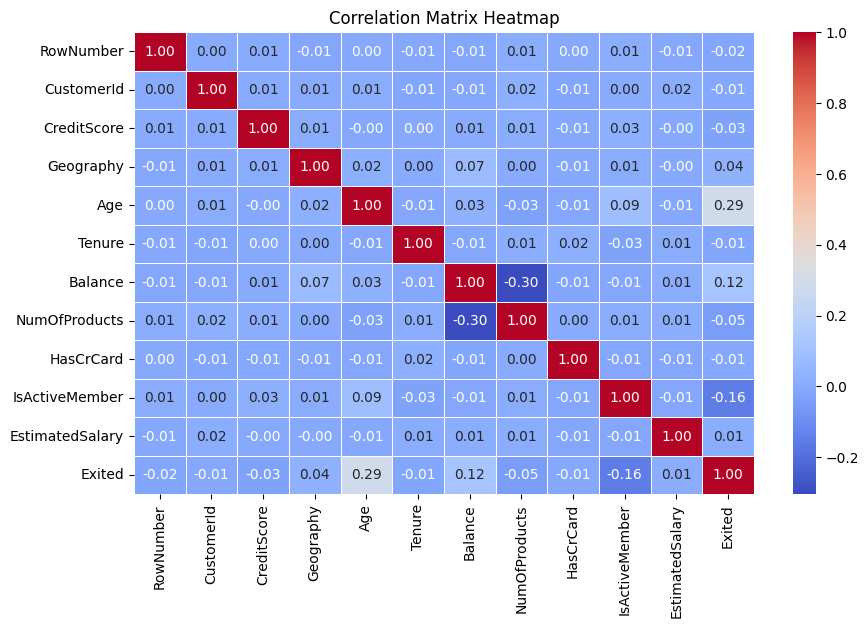

In [64]:
corr_matrix = df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


plt.title("Correlation Matrix Heatmap")
plt.show()

Dropping usless columns

In [65]:
df = df.drop(columns=['RowNumber','CustomerId','Tenure', 'EstimatedSalary', 'HasCrCard', 'NumOfProducts', 'Geography', 'CreditScore'])

Changing Datatypes

In [74]:
df['Balance'] = df['Balance'].astype(int)

Checking and Removing unwanted Outliers

In [80]:
def remove_outliers(df, col, threshold=2.5):  # More flexible than 1.5x IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)

    # Removing only severe outliers
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for col in ["Balance", "Age", "IsActiveMember"]:
    df = remove_outliers(df, col)


Splitting data

In [81]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Splitting data into variables

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

Applying model

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8035


Comapring Results

In [89]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}
df_compare = pd.DataFrame(my_dict)
df_compare

,Actual,Pred,Residual
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1995,1,0,1
1996,0,0,0
1997,1,0,1
1998,1,0,1


Visualising Model Accuracy

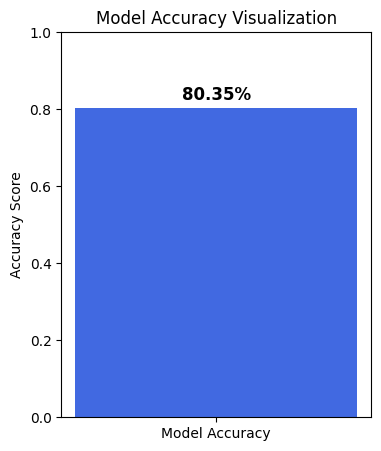

In [91]:
import matplotlib.pyplot as plt

accuracy = 0.8035  # Your model's accuracy

plt.figure(figsize=(4,5))
plt.bar(["Model Accuracy"], [accuracy], color='royalblue')
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Visualization")
plt.text(0, accuracy + 0.02, f"{accuracy*100:.2f}%", ha='center', fontsize=12, fontweight='bold')
plt.show()


Training Accurcay VS Testing Accuracy

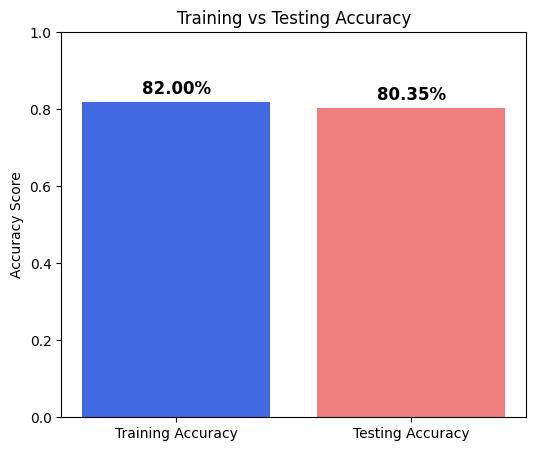

In [92]:
import matplotlib.pyplot as plt

train_accuracy = 0.82  # Example accuracy for training set
test_accuracy = 0.8035  # Your test accuracy

plt.figure(figsize=(6,5))
plt.bar(["Training Accuracy", "Testing Accuracy"], [train_accuracy, test_accuracy], color=['royalblue', 'lightcoral'])
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Training vs Testing Accuracy")
plt.text(0, train_accuracy + 0.02, f"{train_accuracy*100:.2f}%", ha='center', fontsize=12, fontweight='bold')
plt.text(1, test_accuracy + 0.02, f"{test_accuracy*100:.2f}%", ha='center', fontsize=12, fontweight='bold')
plt.show()
